In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   #if like me you do not have a lot of memory in your GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "" #then these two lines force keras to use your CPU
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import numpy as np
import os
import shutil
np.random.seed(42)
import cv2
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# reshaping the dimensions from 2D to 3D should follow the rule:
# n x m x d = n x m x p x d
# i.e., their product should be same

In [3]:
train_dir = 'D:\\something-something-project\\train-images\\'
validation_dir = 'D:\\something-something-project\\validation-images\\'

In [4]:
# listing images directory for train and validation
train_files = os.listdir(train_dir)
print (train_files)

validation_files = os.listdir(validation_dir)
print (validation_files)

['Dropping_something', 'Holding_something', 'Moving_something', 'Picking_something', 'Poking_something', 'Pouring_something', 'Putting_something', 'Showing_something', 'Tearing_something']
['Dropping_something', 'Holding_something', 'Moving_something', 'Picking_something', 'Poking_something', 'Pouring_something', 'Putting_something', 'Showing_something', 'Tearing_something']


In [5]:
# generating the full system path
train_files_dir = []
validation_files_dir = []

for f in train_files:
    if os.path.join(train_dir, f):
        train_files_dir.append(os.path.join(train_dir, f))
        
for f in validation_files:
    if os.path.join(validation_dir, f):
        validation_files_dir.append(os.path.join(validation_dir, f))
        
print (train_files_dir)
print (validation_files_dir)

['D:\\something-something-project\\train-images\\Dropping_something', 'D:\\something-something-project\\train-images\\Holding_something', 'D:\\something-something-project\\train-images\\Moving_something', 'D:\\something-something-project\\train-images\\Picking_something', 'D:\\something-something-project\\train-images\\Poking_something', 'D:\\something-something-project\\train-images\\Pouring_something', 'D:\\something-something-project\\train-images\\Putting_something', 'D:\\something-something-project\\train-images\\Showing_something', 'D:\\something-something-project\\train-images\\Tearing_something']
['D:\\something-something-project\\validation-images\\Dropping_something', 'D:\\something-something-project\\validation-images\\Holding_something', 'D:\\something-something-project\\validation-images\\Moving_something', 'D:\\something-something-project\\validation-images\\Picking_something', 'D:\\something-something-project\\validation-images\\Poking_something', 'D:\\something-somethin

In [6]:
# printing number of images in each directories
print ("Training Data")
for d in train_files_dir:
    print (d, len(os.listdir(d)))

Training Data
D:\something-something-project\train-images\Dropping_something 15941
D:\something-something-project\train-images\Holding_something 25433
D:\something-something-project\train-images\Moving_something 56940
D:\something-something-project\train-images\Picking_something 3841
D:\something-something-project\train-images\Poking_something 14179
D:\something-something-project\train-images\Pouring_something 7280
D:\something-something-project\train-images\Putting_something 64208
D:\something-something-project\train-images\Showing_something 15682
D:\something-something-project\train-images\Tearing_something 11816


In [7]:
# printing number of images in each directories
print ("Validation Data")
for d in validation_files_dir:
    print (d, len(os.listdir(d)))

Validation Data
D:\something-something-project\validation-images\Dropping_something 3108
D:\something-something-project\validation-images\Holding_something 4148
D:\something-something-project\validation-images\Moving_something 7463
D:\something-something-project\validation-images\Picking_something 774
D:\something-something-project\validation-images\Poking_something 1618
D:\something-something-project\validation-images\Pouring_something 2023
D:\something-something-project\validation-images\Putting_something 7867
D:\something-something-project\validation-images\Showing_something 2627
D:\something-something-project\validation-images\Tearing_something 3851


In [8]:
# loading training data
train_data = []
train_labels = []
for d in train_files_dir:
    print ('Directory: ', d)
    # commenting out so that one can read all the images, I have less RAM
    count = 0
    files = glob.glob(d + "/*.jpg")
    imgs = []
    for img in files:
        # print (img)
        if count == 1000:
            break
        if not os.path.isfile(img):
            continue
        image = cv2.imread(img)
        imgs.append(cv2.resize(image, (224,224)))
        train_labels.append(d.split("D:\\something-something-project\\train-images\\")[1])
        count += 1
    train_data = train_data + imgs

Directory:  D:\something-something-project\train-images\Dropping_something
Directory:  D:\something-something-project\train-images\Holding_something
Directory:  D:\something-something-project\train-images\Moving_something
Directory:  D:\something-something-project\train-images\Picking_something
Directory:  D:\something-something-project\train-images\Poking_something
Directory:  D:\something-something-project\train-images\Pouring_something
Directory:  D:\something-something-project\train-images\Putting_something
Directory:  D:\something-something-project\train-images\Showing_something
Directory:  D:\something-something-project\train-images\Tearing_something


In [9]:
# loading validation data
validation_data = []
validation_labels = []
for d in validation_files_dir:
    print ('Directory: ', d)
    count = 0
    files = glob.glob(d + "/*.jpg")
    imgs = []
    for img in files:
        if count == 1000:
            break
        if not os.path.isfile(img):
            continue
        image = cv2.imread(img)
        imgs.append(cv2.resize(image, (224,224)))
        validation_labels.append(d.split("D:\\something-something-project\\validation-images\\")[1])
        count += 1
    validation_data = validation_data + imgs

Directory:  D:\something-something-project\validation-images\Dropping_something
Directory:  D:\something-something-project\validation-images\Holding_something
Directory:  D:\something-something-project\validation-images\Moving_something
Directory:  D:\something-something-project\validation-images\Picking_something
Directory:  D:\something-something-project\validation-images\Poking_something
Directory:  D:\something-something-project\validation-images\Pouring_something
Directory:  D:\something-something-project\validation-images\Putting_something
Directory:  D:\something-something-project\validation-images\Showing_something
Directory:  D:\something-something-project\validation-images\Tearing_something


In [10]:
print ("Train Data: ", len(train_data), "\tTrain Labels: ", len(train_labels))
print ("Validation Data: ", len(validation_data), "\tValidation Labels: ", len(validation_labels))

Train Data:  9000 	Train Labels:  9000
Validation Data:  8774 	Validation Labels:  8774


In [11]:
def array_to_color(array, cmap="Oranges"):
    s_m = plt.cm.ScalarMappable(cmap=cmap)
    return s_m.to_rgba(array)[:,:-1]


def rgb_data_transform(data):
    data_t = []
    for i in range(data.shape[0]):
        # print(data[i].shape)
        data_t.append(data[i].reshape(32, 32, 49, 3))
    return np.asarray(data_t, dtype=np.float32)

In [12]:
x_train = rgb_data_transform(np.array(train_data))
x_validation = rgb_data_transform(np.array(validation_data))

In [13]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# one hot encoding for training and validation
label_encoder = LabelEncoder()
train_labels_integer_encoded = label_encoder.fit_transform(train_labels)
validation_labels_integer_encoded = label_encoder.fit_transform(validation_labels)

# print(train_labels_integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
train_labels_integer_encoded = train_labels_integer_encoded.reshape(len(train_labels_integer_encoded), 1)
train_label_enc = onehot_encoder.fit_transform(train_labels_integer_encoded)

validation_labels_integer_encoded = validation_labels_integer_encoded.reshape(len(validation_labels_integer_encoded), 1)
validation_label_enc = onehot_encoder.fit_transform(validation_labels_integer_encoded)


In [15]:
sample_shape = (32, 32, 49, 3)
# Create the model
model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(9, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])
model.summary()
# Fit data to model
history = model.fit(x_train, train_label_enc,
            validation_data=(x_validation, validation_label_enc),
            batch_size=28,
            epochs=40,
            verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 30, 30, 47, 32)    2624      
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 15, 15, 23, 32)    0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 15, 15, 23, 32)    128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 23, 32)    0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 13, 13, 21, 64)    55360     
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 6, 6, 10, 64)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 6, 6, 10, 64)     

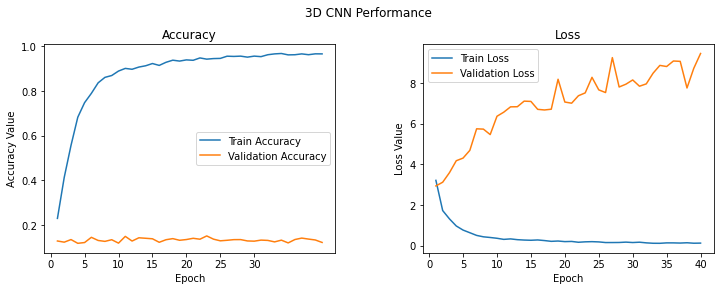

In [16]:
# plotting accuracy
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('3D CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,41))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 41, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")